# Импорт библиотек

In [49]:
from pandas import read_csv as read
import pandas as pd
import random

import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as train

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from plot import pltPRcurve, pltROCcurve

# Используемые модели

In [98]:
models = []
models.append(RandomForestClassifier(n_estimators=110, n_jobs=-1))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(GaussianNB())
#models.append(GradientBoostingClassifier(max_depth=4))
#models.append(DecisionTreeClassifier())


# Вспомогательные функции

In [93]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
   

    return ax

    


In [65]:
def plot_corr():
    correlation_matrix = data.corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.savefig("cor.png")
    plt.show()

In [4]:
def modExec():
    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(f"Acc:\t{accuracy_score(expected, predicted)}")
    print(f"Pre:\t{precision_score(expected, predicted)}")
    print(f"Re:\t{recall_score(expected, predicted)}")
    print(f"F1:\t{f1_score(expected, predicted)}")
    
    print(conf_matrix)

In [96]:
def modExec1(models, drawPR=False, drawRoc=False):
    for model in models:

        model.fit(X_train, y_train)
        expected = y_test
        predicted = model.predict(X_test)

        pobas = model.predict_proba(X_test)
        preds = pobas[:, 1]

        name = type(model).__name__
        
        if drawPR:
           pltPRcurve(expected, predicted, preds, name)
        
        if drawRoc:
           pltROCcurve(expected, predicted, preds, name)
        
        report = metrics.classification_report(expected, predicted)
        conf_matrix = metrics.confusion_matrix(expected, predicted)

        print(name)
        print(f"Acc: {accuracy_score(expected, predicted)}")
        print(f"Pre: {precision_score(expected, predicted)}")
        print(f"Re: {recall_score(expected, predicted)}")
        print(f"F1: {f1_score(expected, predicted)}")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(expected, predicted, classes=['No fraud', 'Fraud'],
                          title=f'{name}')
        plt.grid(False)
        plt.savefig(f"conf{name}.png", dpi=300)
        plt.close()

        print(conf_matrix)
        print()
        

# Анализ на сырых данных

In [67]:
path = "filtData500k.csv"
data = read(path, delimiter=",")

In [68]:
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [69]:
X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

RandomForestClassifier
Acc: 0.993419740777667
Pre: 0.9947759142150123
Re: 0.8301973382285452
F1: 0.9050656660412758
Confusion matrix, without normalization
[[110968     19]
 [   740   3618]]
[[110968     19]
 [   740   3618]]

KNeighborsClassifier
Acc: 0.9908188478044129
Pre: 0.9545329291815927
Re: 0.7948600275355667
F1: 0.8674095405033178
Confusion matrix, without normalization
[[110822    165]
 [   894   3464]]
[[110822    165]
 [   894   3464]]

GaussianNB
Acc: 0.964697212709697
Pre: 0.595460614152203
Re: 0.20468104635153742
F1: 0.3046448087431694
Confusion matrix, without normalization
[[110381    606]
 [  3466    892]]
[[110381    606]
 [  3466    892]]



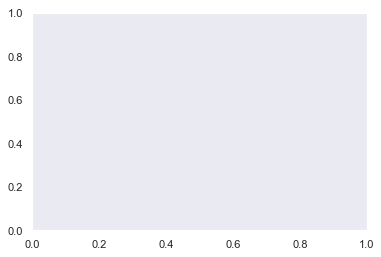

In [99]:
 modExec1(models)

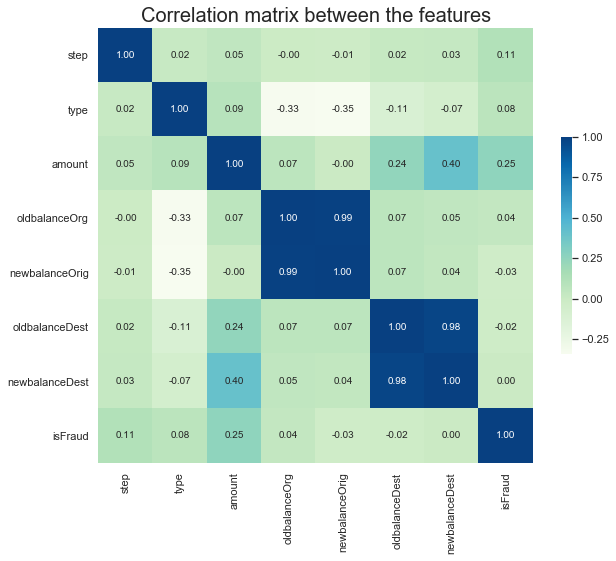

In [10]:
plot_corr()

In [11]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,4,181.00,181.0,0.00,0.0,0.0,1
1,1,1,181.00,181.0,0.00,21182.0,0.0,1
2,1,3,7107.77,183195.0,176087.23,0.0,0.0,0
3,1,3,671.64,15123.0,14451.36,0.0,0.0,0
4,1,3,1373.43,13854.0,12480.57,0.0,0.0,0


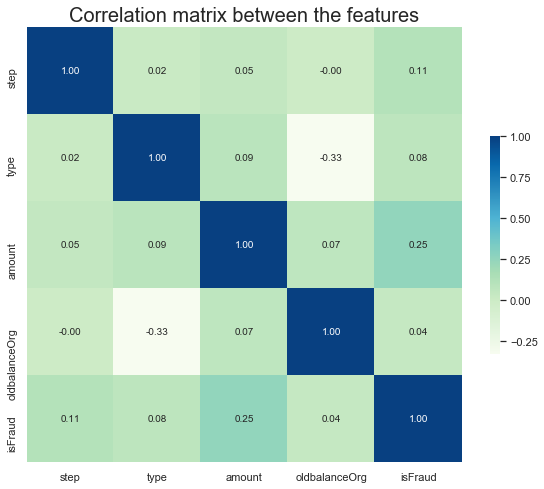

In [12]:
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)


plot_corr()

# Проектирование признаков

In [107]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

In [108]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown


X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

### Отбор признаков рекурсивным исключением

In [47]:
# feature extraction

model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

rfe = RFE(model, 5)

fit = rfe.fit(X_train, y_train)

print(fit.support_)
print(fit.ranking_)

[ True False  True  True  True False False False False False False  True]
[1 2 1 1 1 7 4 5 6 8 3 1]


In [48]:
model.fit(X_train, y_train)
print(model.feature_importances_)

[8.97358848e-02 6.28217920e-02 2.51308605e-01 3.70416663e-01
 1.21396308e-01 9.05871316e-06 1.24853791e-02 9.50625216e-03
 4.83589338e-04 2.00356401e-07 1.63512573e-02 6.54850104e-02]


In [17]:
l = model.feature_importances_.tolist()
print(l)

[0.0842200342717042, 0.066174313003469, 0.2465933636898042, 0.38613627028670866, 0.11827053698779862, 1.2580940442978742e-05, 0.012321895282457961, 0.007471023899165123, 0.0004547627146197941, 1.9452598885072306e-07, 0.01503971709036167, 0.06330530730747876]


In [18]:
data.head()

,step,type,amount,oldbalanceOrg,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB
0,1,4,181.00,181.0,1,1,1,1,0,0,0,0,1
1,1,1,181.00,181.0,1,1,1,1,0,0,0,0,1
2,1,3,7107.77,183195.0,0,1,1,1,1,0,0,0,0
3,1,3,671.64,15123.0,0,1,1,1,1,0,0,0,0
4,1,3,1373.43,13854.0,0,1,1,1,1,0,0,0,0


In [109]:
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,isFraud,hour,merchant,LTR,IZoB
0,1,4,181.00,181.0,1,1,0,0,1
1,1,1,181.00,181.0,1,1,0,0,1
2,1,3,7107.77,183195.0,0,1,1,0,0
3,1,3,671.64,15123.0,0,1,1,0,0
4,1,3,1373.43,13854.0,0,1,1,0,0


In [110]:
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)

data.head()

,step,type,amount,oldbalanceOrg,isFraud,hour,IZoB
0,1,4,181.00,181.0,1,1,1
1,1,1,181.00,181.0,1,1,1
2,1,3,7107.77,183195.0,0,1,0
3,1,3,671.64,15123.0,0,1,0
4,1,3,1373.43,13854.0,0,1,0


In [111]:
data.drop('step', axis=1, inplace=True)
data.head()

,type,amount,oldbalanceOrg,isFraud,hour,IZoB
0,4,181.00,181.0,1,1,1
1,1,181.00,181.0,1,1,1
2,3,7107.77,183195.0,0,1,0
3,3,671.64,15123.0,0,1,0
4,3,1373.43,13854.0,0,1,0


In [113]:
data.drop('hour', axis=1, inplace=True)
data.head()

,type,amount,oldbalanceOrg,isFraud,IZoB
0,4,181.00,181.0,1,1
1,1,181.00,181.0,1,1
2,3,7107.77,183195.0,0,0
3,3,671.64,15123.0,0,0
4,3,1373.43,13854.0,0,0


RandomForestClassifier
Acc: 0.9931596514803416
Pre: 0.980349932705249
Re: 0.8357044515832951
F1: 0.9022668153102936
Confusion matrix, without normalization
[[110914     73]
 [   716   3642]]
[[110914     73]
 [   716   3642]]

KNeighborsClassifier
Acc: 0.995916598031991
Pre: 0.9567567567567568
Re: 0.9341441027994493
F1: 0.94531522117729
Confusion matrix, without normalization
[[110803    184]
 [   287   4071]]
[[110803    184]
 [   287   4071]]

GaussianNB
Acc: 0.963544150158221
Pre: 0.5527950310559007
Re: 0.18379990821477743
F1: 0.2758739452385053
Confusion matrix, without normalization
[[110339    648]
 [  3557    801]]
[[110339    648]
 [  3557    801]]



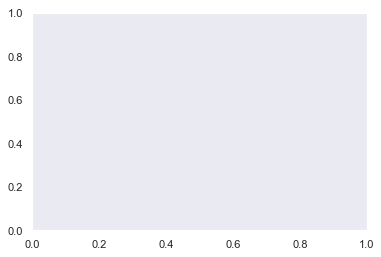

In [114]:
modExec1(models)

# Нормализация

In [123]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
data.head()

,type,amount,oldbalanceOrg,isFraud,hour,IZoB
0,4,181.00,181.0,1,1,1
1,1,181.00,181.0,1,1,1
2,3,7107.77,183195.0,0,1,0
3,3,671.64,15123.0,0,1,0
4,3,1373.43,13854.0,0,1,0


In [124]:
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

RandomForestClassifier
Acc: 0.9962287051887815
Pre: 0.9858806044092148
Re: 0.9132629646626893
F1: 0.9481834425253127
Confusion matrix, without normalization
[[110930     57]
 [   378   3980]]
[[110930     57]
 [   378   3980]]

KNeighborsClassifier
Acc: 0.9967575534266765
Pre: 0.9556267154620312
Re: 0.9586966498393759
F1: 0.9571592210767469
Confusion matrix, without normalization
[[110793    194]
 [   180   4178]]
[[110793    194]
 [   180   4178]]

GaussianNB
Acc: 0.9634661233690234
Pre: 0.547682119205298
Re: 0.18976594768242314
F1: 0.28186775732788
Confusion matrix, without normalization
[[110304    683]
 [  3531    827]]
[[110304    683]
 [  3531    827]]



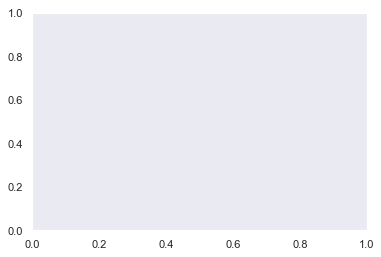

In [116]:
modExec1(models)

In [126]:
dataset = pd.DataFrame({'type':X[:,0],'amount':X[:,1], 'hour':X[:,2], 'iZoB':X[:,3]})
dataset.head()

,type,amount,hour,iZoB
0,4.0,181.00,181.0,1.0
1,1.0,181.00,181.0,1.0
2,3.0,7107.77,183195.0,1.0
3,3.0,671.64,15123.0,1.0
4,3.0,1373.43,13854.0,1.0


In [127]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)

In [120]:
dataset = pd.DataFrame({'type':normalized_X[:,0],'amount':normalized_X[:,1], 'hour':normalized_X[:,2], 'iZoB':normalized_X[:,3]})
dataset.head()

,type,amount,hour,iZoB
0,0.015625,0.707010,0.707010,0.003906
1,0.003907,0.707091,0.707091,0.003907
2,0.000016,0.038770,0.999248,0.000005
3,0.000198,0.044368,0.999015,0.000066
4,0.000215,0.098652,0.995122,0.000072


RandomForestClassifier
Acc: 0.999809267848628
Pre: 1.0
Re: 0.9949518127581459
F1: 0.9974695192086496
Confusion matrix, without normalization
[[110987      0]
 [    22   4336]]
[[110987      0]
 [    22   4336]]

KNeighborsClassifier
Acc: 0.9989596428106984
Pre: 0.9976514795678723
Re: 0.9747590637907297
F1: 0.9860724233983287
Confusion matrix, without normalization
[[110977     10]
 [   110   4248]]
[[110977     10]
 [   110   4248]]

GaussianNB
Acc: 0.9615414625688153
Pre: 0.1953125
Re: 0.005736576411197797
F1: 0.011145786892554615
Confusion matrix, without normalization
[[110884    103]
 [  4333     25]]
[[110884    103]
 [  4333     25]]



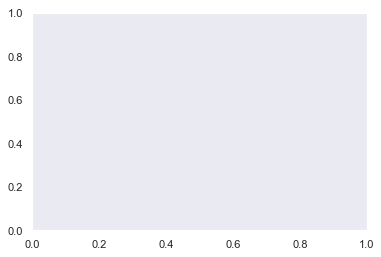

In [128]:
X = normalized_X
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

modExec1(models, True, False)

In [28]:
X = standardized_X
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

modExec1(models)

RandomForestClassifier
Acc: 0.9961766873293164
Pre: 0.9861007694216928
Re: 0.9116567232675539
F1: 0.9474186240610468
[[110931     56]
 [   385   3973]]

KNeighborsClassifier
Acc: 0.9910702674584941
Pre: 0.956140350877193
Re: 0.8003671408903167
F1: 0.8713464901324007
[[110827    160]
 [   870   3488]]

GaussianNB
Acc: 0.9601976678659673
Pre: 0.4589644240929905
Re: 0.2989903625516292
F1: 0.3620953174934
[[109451   1536]
 [  3055   1303]]

GradientBoostingClassifier
Acc: 0.9935497854263297
Pre: 0.982896846606093
Re: 0.8439651216154199
F1: 0.9081481481481481
[[110923     64]
 [   680   3678]]

DecisionTreeClassifier
Acc: 0.9963327409077116
Pre: 0.976738551005573
Re: 0.9249655805415328
F1: 0.9501473187978786
[[110891     96]
 [   327   4031]]



# Попытки amount и oldbalanceOrg на amountToOld

In [29]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

In [30]:
data['amountToOld'] = data['amount'] / data['oldbalanceOrg']

data.loc[data.amountToOld > 1000000000, 'amountToOld'] = -1
data.fillna(-1)
data.drop('amount', axis=1, inplace=True)
data.drop('oldbalanceOrg', axis=1, inplace=True)
data['amountToOld'].max()

438304.595

In [31]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()
data.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').